In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
survival_df = pd.read_csv("/Users/lindseyvalput/Desktop/Patient-Survival-Model/Resources/cleaned_data_survival_prediction.csv")

# survival_df = pd.read_csv("../Patient-Survival-Model/Resources/cleaned_data_survival_prediction.csv")

survival_df.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
3,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,admit,Med-Surg ICU,0.004861,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0
4,46.0,25.845717,0,Hispanic,M,167.6,Accident & Emergency,admit,CTICU,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [4]:
# survival_df_features = survival_df[['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
#                                   'd1_spo2_min', 'd1_temp_min', 'd1_sysbp_noninvasive_min',
#                                   'd1_sysbp_min', 'd1_heartrate_min', 'heart_rate_apache',
#                                   'apache_3j_diagnosis', 'pre_icu_los_days','hospital_death']]

In [3]:
# X = survival_df_features.drop('hospital_death', axis=1)
# y = survival_df_features['hospital_death']

X = survival_df.drop('hospital_death', axis=1)
y = survival_df['hospital_death']


In [4]:
X = pd.get_dummies(X)


### Balance the data set - OVERsampling

In [5]:
#Balance Data - oversampling
ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))



Original dataset shape Counter({0: 52044, 1: 4891})
Resample dataset shape Counter({0: 52044, 1: 52044})


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=45)


In [7]:
clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.8116977941741603
Testing Score: 0.8072400276688956


In [8]:
y_true = y_test
y_pred = clf.predict(X_test)

print('Test Acc: %.3f' % clf.score(X_test, y_test))
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Test Acc: 0.807
[[10505  2578]
 [ 2438 10501]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     13083
           1       0.80      0.81      0.81     12939

    accuracy                           0.81     26022
   macro avg       0.81      0.81      0.81     26022
weighted avg       0.81      0.81      0.81     26022



In [9]:
feature_importances = clf.feature_importances_

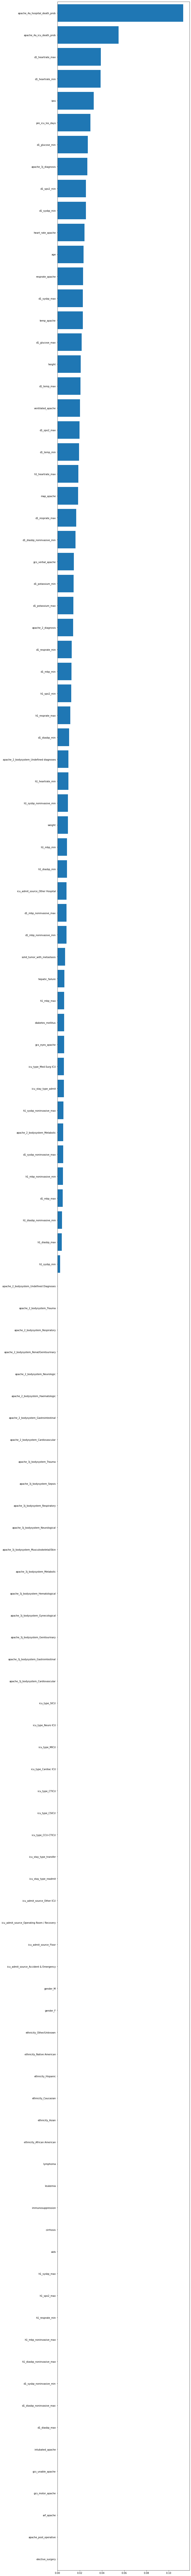

In [10]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()